The goal of this assignment is for you to explore a complete analysis using the unsupervised learning techniques covered in the last class. You’ll extend what you’ve learned by combining PCA as a preprocessing step to K Means clustering using data that consist of measurements of cell nuclei of human breast masses. Values in this data set describe characteristics of the cell nuclei present in digitized images of a fine needle aspiration (FNA) of a breast mass. For example radius (i.e. mean of distances from center to points on the perimeter), texture (i.e. standard deviation of gray-scale values), and smoothness (local variation in radius lengths). Summary information is also provided for each group of cells including diagnosis (i.e. benign (not cancerous) and malignant (cancerous)).

Complete the following tasks and answer the questions that follow:

**1. Preparing the data**
Before we can begin our analysis we first have to download and import our data using the following code:
```
import pandas as pd
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
target_lbl = breast_cancer.target
pd_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
pd_df.head()
```
**2. Exploratory data analysis**
The first step of any data analysis, unsupervised or supervised, is to familiarize yourself with the data.

Explore the data you created before to answer the following questions:

- Q1. How many observations are in this dataset?



- Q2. How many of the observations have a malignant diagnosis?

The functions dim(), length(), grep() and sum() may be useful for answering the first 3 questions above.

**3. Performing PCA** - The next step in your analysis is to perform principal component analysis (PCA) on  data.

It is important to check if the data need to be scaled before performing PCA. Recall two common reasons for scaling data include:

-- The input variables use different units of measurement.

-- The input variables have significantly different variances.

-- Check the mean and standard deviation of the features (i.e. columns) of the  to determine if the data should be scaled.

- Q3. From your results, what proportion of the original variance is captured by the first principal components (PC1)?

- Q4. How many principal components (PCs) are required to describe at least 70% of the original variance in the data?

- Q5. How many principal components (PCs) are required to describe at least 90% of the original variance in the data?

**4. Interpreting PCA results**: Now you will use some visualizations to better understand your PCA model. You are encouraged to experiment with additional visualizations.

Create a biplot of the PC using the biplot() function. A Biplot is an enhanced scatterplot that uses both points and vectors to represent structure (https://www.uv.es/visualstats/vista-frames/help/lecturenotes/lecture13/biplot.html)

Refer the code and tutorial:
https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e/?source=friends_link&sk=65bf5440e444c24aff192fedf9f8b64f

- Q6. What stands out to you about this plot? Is it easy or difficult to understand? Why?

- Q7. Repeat the same for principal components 1 and 3. What do you notice about these plots?


**5. Building machine learning model**
- cluster the data with the K-means algorithm

-- setting the k parameter to 2, fit the model, and the compute the Silhouette score) (i.e., a measure of quality of the obtained clustering).

take the predictions produced by K-means, and compare them with the labels variable (i.e., the ground truth from our dataset).

-- Then, compute how many data points in the dataset have been clustered correctly (i.e., positive cases in one cluster, negative cases in the other).
        

IMPORTANT: K-means is a clustering algorithm, so it will not output a label for each data point, but just a cluster identifier! As such, label 0 does not necessarily match the cluster identifier 0.

-- Therefore, apply majority voting to map the cluster labels to ground truth

-- Compute the accuracy

**6. perform dimensionality reduction** on the features using the PCA statistical procedure, use 2 principal components

**7. Now run K-means** with the same parameters as above, but on the pca tranformed Features produced by the PCA reduction .

-- also compute the Silhouette score, as well as the number of data points that have been clustered correctly.

-- Accuracy after PCA

**8. Explain your result**

- Q8. Silhoutte score before and after PCA

# 1. Preparing the Data

In [36]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
target_lbl = breast_cancer.target
pd_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
pd_df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 2. Exploratory Data Analysis
- Q1. How many observations are in this dataset?



- Q2. How many of the observations have a malignant diagnosis?



In [37]:
num_observations = pd_df.shape[0]
print("Number of observations:", num_observations)

malignant_count = sum(target_lbl == 0)
print("Number of malignant diagnoses:", malignant_count)


print(pd_df.shape)

Number of observations: 569
Number of malignant diagnoses: 212
(569, 30)


# 3. Performing PCA

PCA reduces the number of features (dimensions) while retaining as much variance (information) as possible. It does this by transforming the original variables into a new set of uncorrelated variables called Principal Components (PC).

-- The input variables use different units of measurement.

-- The input variables have significantly different variances.

-- Check the mean and standard deviation of the features (i.e. columns) of the  to determine if the data should be scaled.


In [38]:
# Check if data needs to be scaled
pd_df.describe().loc[['mean', 'std']]


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061


The means and the standard deviations are very different across the features, so we should scale the data.

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(pd_df)  # Now every column has mean=0 and std=1


In [40]:
from sklearn.decomposition import PCA

pca = PCA()  # Can only visualize with 2 components
pca_data = pca.fit_transform(scaled_data)
print(pca.components_)


[[ 2.18902444e-01  1.03724578e-01  2.27537293e-01  2.20994985e-01
   1.42589694e-01  2.39285354e-01  2.58400481e-01  2.60853758e-01
   1.38166959e-01  6.43633464e-02  2.05978776e-01  1.74280281e-02
   2.11325916e-01  2.02869635e-01  1.45314521e-02  1.70393451e-01
   1.53589790e-01  1.83417397e-01  4.24984216e-02  1.02568322e-01
   2.27996634e-01  1.04469325e-01  2.36639681e-01  2.24870533e-01
   1.27952561e-01  2.10095880e-01  2.28767533e-01  2.50885971e-01
   1.22904556e-01  1.31783943e-01]
 [-2.33857132e-01 -5.97060883e-02 -2.15181361e-01 -2.31076711e-01
   1.86113023e-01  1.51891610e-01  6.01653628e-02 -3.47675005e-02
   1.90348770e-01  3.66575471e-01 -1.05552152e-01  8.99796818e-02
  -8.94572342e-02 -1.52292628e-01  2.04430453e-01  2.32715896e-01
   1.97207283e-01  1.30321560e-01  1.83848000e-01  2.80092027e-01
  -2.19866379e-01 -4.54672983e-02 -1.99878428e-01 -2.19351858e-01
   1.72304352e-01  1.43593173e-01  9.79641143e-02 -8.25723507e-03
   1.41883349e-01  2.75339469e-01]
 [-8.5

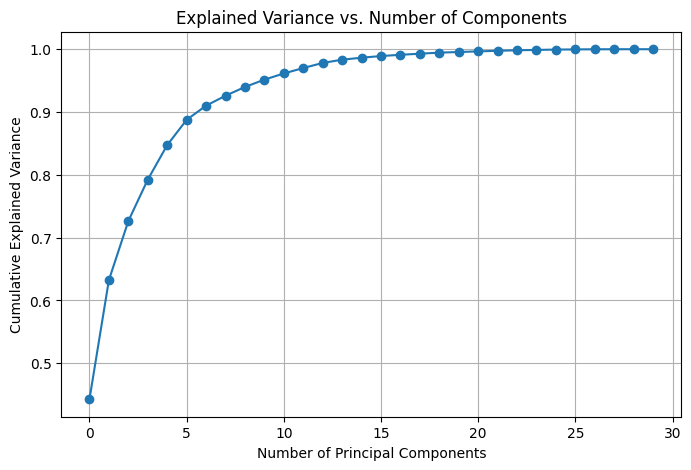

In [41]:
import matplotlib.pyplot as plt
import numpy as np

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


In [42]:
print("Q3: Variance captured by PC1:", explained_variance[0])
print("Q4: PCs for 70% variance:", np.argmax(cumulative_variance >= 0.70) + 1)
print("Q5: PCs for 90% variance:", np.argmax(cumulative_variance >= 0.90) + 1)

Q3: Variance captured by PC1: 0.44272025607526366
Q4: PCs for 70% variance: 3
Q5: PCs for 90% variance: 7


# 4. Interpreting PCA results

In [43]:
# To interpret PCA results, we need the number of components = 2
pca_2 = PCA(n_components=2)
pca_data_2d = pca_2.fit_transform(scaled_data)


In [44]:
print(pca_2.components_)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


In [45]:
print(pca_2.explained_variance_)

[13.30499079  5.7013746 ]


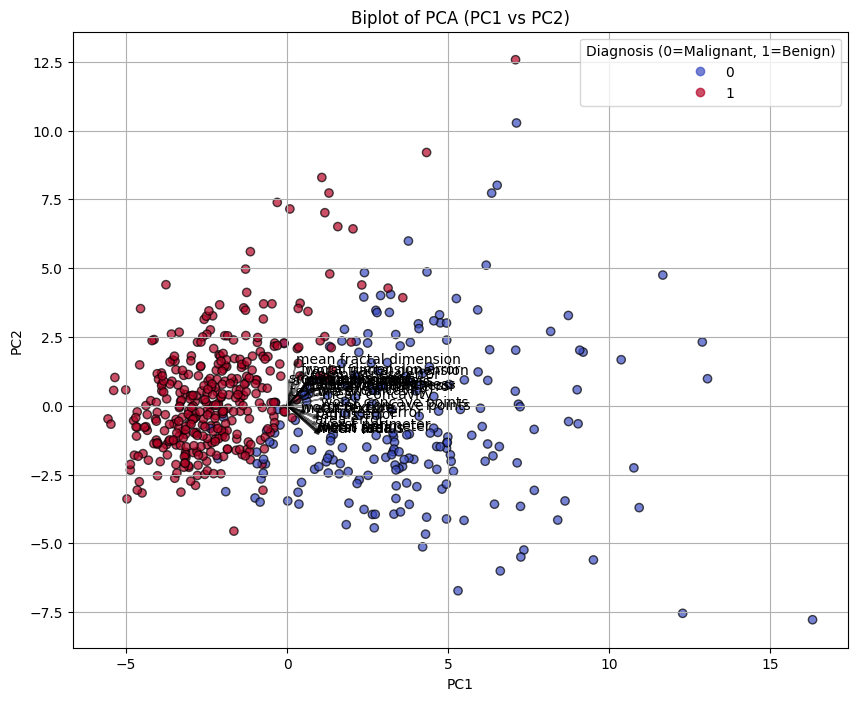

In [46]:
def biplot(score, coeff, labels=None, target=target_lbl, title='PCA Biplot'):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    
    # Plot the PCA scores (scatter of the projected data)
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(xs, ys, c=target, cmap='coolwarm', edgecolor='k', alpha=0.7)
    
    # Plot the vectors (loadings) for each feature
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0]*4, coeff[i, 1]*4,
                  color='black', alpha=0.5, head_width=0.1)
        if labels is None:
            plt.text(coeff[i, 0]*4.2, coeff[i, 1]*4.2, f"Var{i+1}", color='black')
        else:
            plt.text(coeff[i, 0]*4.2, coeff[i, 1]*4.2, labels[i], color='black')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(title)
    plt.grid()
    plt.legend(*scatter.legend_elements(), title="Diagnosis (0=Malignant, 1=Benign)")
    plt.show()

# Run biplot with your PCA data
biplot(
    score=pca_data_2d,
    coeff=pca_2.components_.T,
    labels=breast_cancer.feature_names,
    target=target_lbl,
    title="Biplot of PCA (PC1 vs PC2)"
)

# 5. Building machine learning model

In [47]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
X = pd_df.values
y = target_lbl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score

kmeans = KMeans(n_clusters=2, random_state=42)
train_clusters = kmeans.fit_predict(X_train)

score_before_pca = silhouette_score(X_train, train_clusters)
print("Silhouette Score (before PCA):", score_before_pca)


Silhouette Score (before PCA): 0.6988025040496695


In [49]:
from scipy.stats import mode
def majority_vote_mapping(y_true, cluster_preds):
    mapping = {}
    for cluster in np.unique(cluster_preds):
        mask = (cluster_preds == cluster)
        mapped_label = mode(y_true[mask], keepdims=True).mode[0]
        mapping[cluster] = mapped_label
    return mapping

cluster_to_label = majority_vote_mapping(y_train, train_clusters)


In [53]:
test_clusters = kmeans.predict(X_test)

results_df = pd.DataFrame({
    "Cluster": list(cluster_to_label.keys()),
    "Mapped Label": list(cluster_to_label.values())
})
results_df["Used for"] = "Train → for mapping"

display(results_df)
y_test_pred = np.array([cluster_to_label[cluster] for cluster in test_clusters])

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy (before PCA): {test_accuracy:.4f}")

,Cluster,Mapped Label,Used for
0,0,0,Train → for mapping
1,1,1,Train → for mapping


Test Accuracy (before PCA): 0.8596


# 6. Perform Dimensionality Reduction

In [51]:
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 7. Now Run K-Means

In [52]:

kmeans_pca = KMeans(n_clusters=2, random_state=42)
train_clusters_pca = kmeans_pca.fit_predict(X_train_pca)

silhouette_pca = silhouette_score(X_train_pca, train_clusters_pca)
print(f"Silhouette Score (after PCA): {silhouette_pca:.4f}")

cluster_to_label_pca = majority_vote_mapping(y_train, train_clusters_pca)

# Predict clusters on PCA test data
test_clusters_pca = kmeans_pca.predict(X_test_pca)
y_test_pred_pca = np.array([cluster_to_label_pca[cluster] for cluster in test_clusters_pca])


# Compute test accuracy
test_accuracy_pca = accuracy_score(y_test, y_test_pred_pca)
print(f"Test Accuracy (after PCA): {test_accuracy_pca:.4f}")

Silhouette Score (after PCA): 0.7000
Test Accuracy (after PCA): 0.8596


# 8. Explain Your Result

In [54]:
print("Silhouette Score (before PCA):", score_before_pca)
print(f"Test Accuracy (before PCA): {test_accuracy:.4f}")

print(f"\nSilhouette Score (after PCA): {silhouette_pca:.4f}")
print(f"Test Accuracy (after PCA): {test_accuracy_pca:.4f}")

Silhouette Score (before PCA): 0.6988025040496695
Test Accuracy (before PCA): 0.8596

Silhouette Score (after PCA): 0.7000
Test Accuracy (after PCA): 0.8596


It seems that before the PCA, the testing accuracy is around 85.96%. 